# Task-05
## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

In [30]:
# Load Dataset
Accidents = pd.read_csv('C:/Users/CHARAN/Downloads/RTA Dataset.csv')

In [31]:
Accidents.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [32]:
# Function to handle missing values and encode categorical variables
def preprocess_data(df):
    # Fill missing values
    df.fillna({'Accident_severity': 'Unknown', 'Age_band_of_driver': 'Unknown'}, inplace=True)
    # Encode categorical variables
    categorical_cols = ['Road_surface_conditions', 'Weather_conditions', 'Accident_severity', 'Age_band_of_driver',
                        'Day_of_week', 'Educational_level', 'Types_of_Junction', 'Number_of_vehicles_involved']
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes
    return df


In [33]:
# Preprocess the data
Accidents = preprocess_data(Accidents)


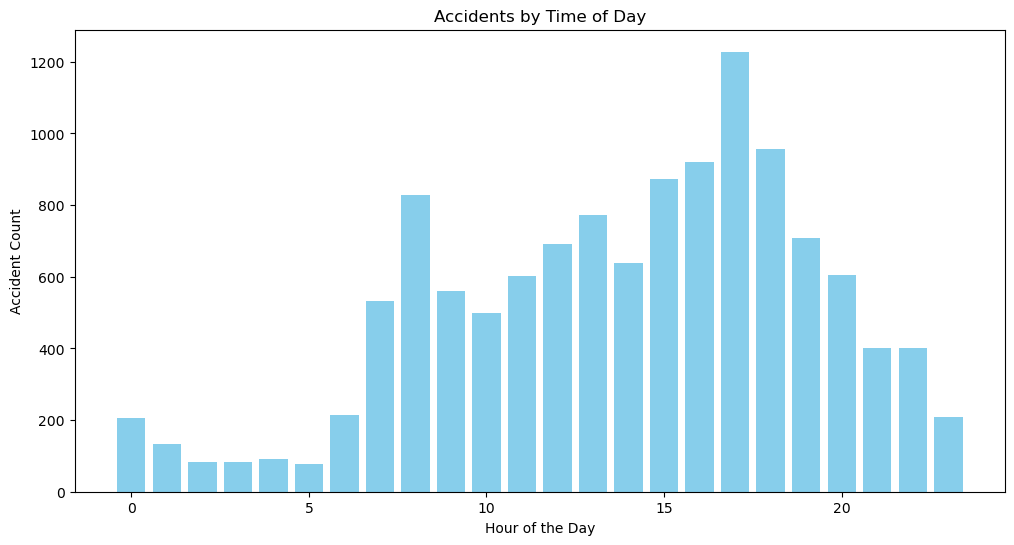

In [34]:
# Time of Day Analysis
Accidents['Time'] = pd.to_datetime(Accidents['Time'])
Accidents['Hour'] = Accidents['Time'].dt.hour
time_of_day_counts = Accidents['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(time_of_day_counts.index, time_of_day_counts.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Time of Day')
plt.show()

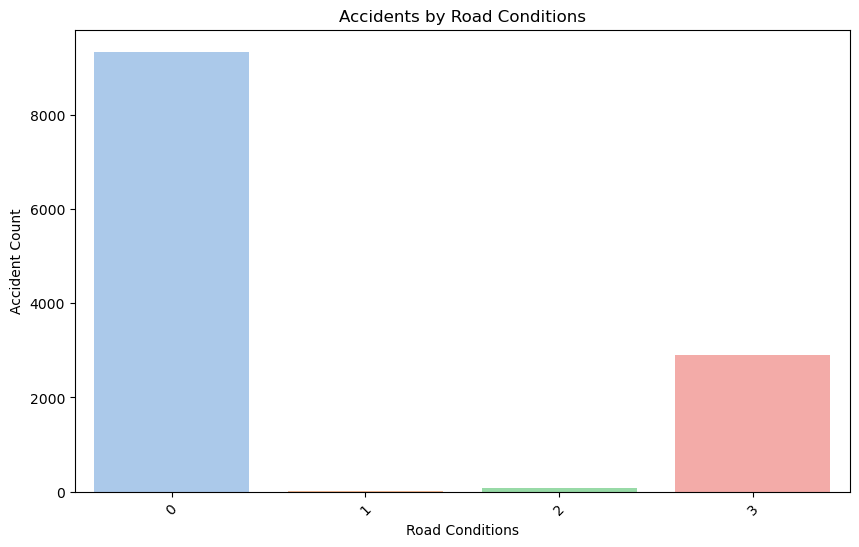

In [35]:
# Road Condition Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_conditions', data=Accidents, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Road Conditions')
plt.ylabel('Accident Count')
plt.title('Accidents by Road Conditions')
plt.show()

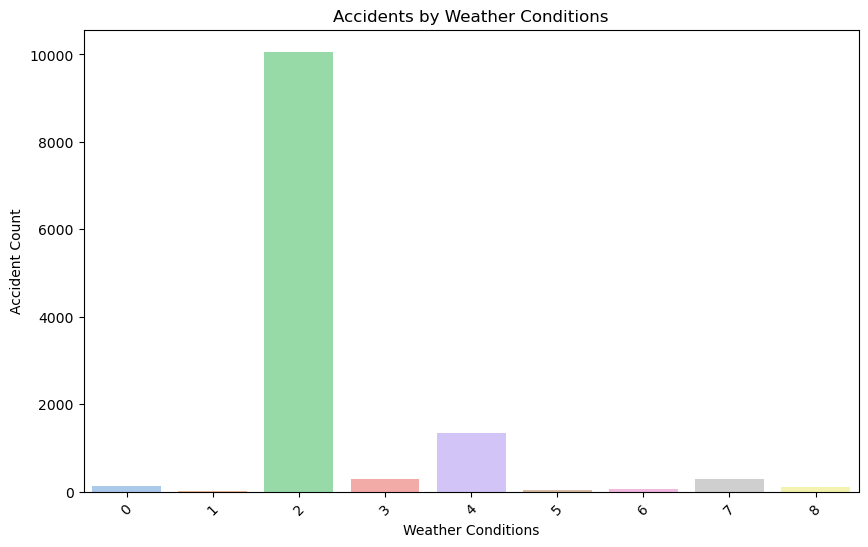

In [36]:
# Weather Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=Accidents, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Count')
plt.title('Accidents by Weather Conditions')
plt.show()

In [37]:
# Function to create interactive subplots
def interactive_subplots(df, category_cols, ncols=3):
    nrows = (len(category_cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
    for i, col in enumerate(category_cols):
        sns.countplot(data=df, x=col, ax=axes[i // ncols, i % ncols], palette='pastel')
        axes[i // ncols, i % ncols].set_title(f'Accidents by {col}')
        axes[i // ncols, i % ncols].set_xlabel(col)
        axes[i // ncols, i % ncols].set_ylabel('Accident Count')
        axes[i // ncols, i % ncols].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

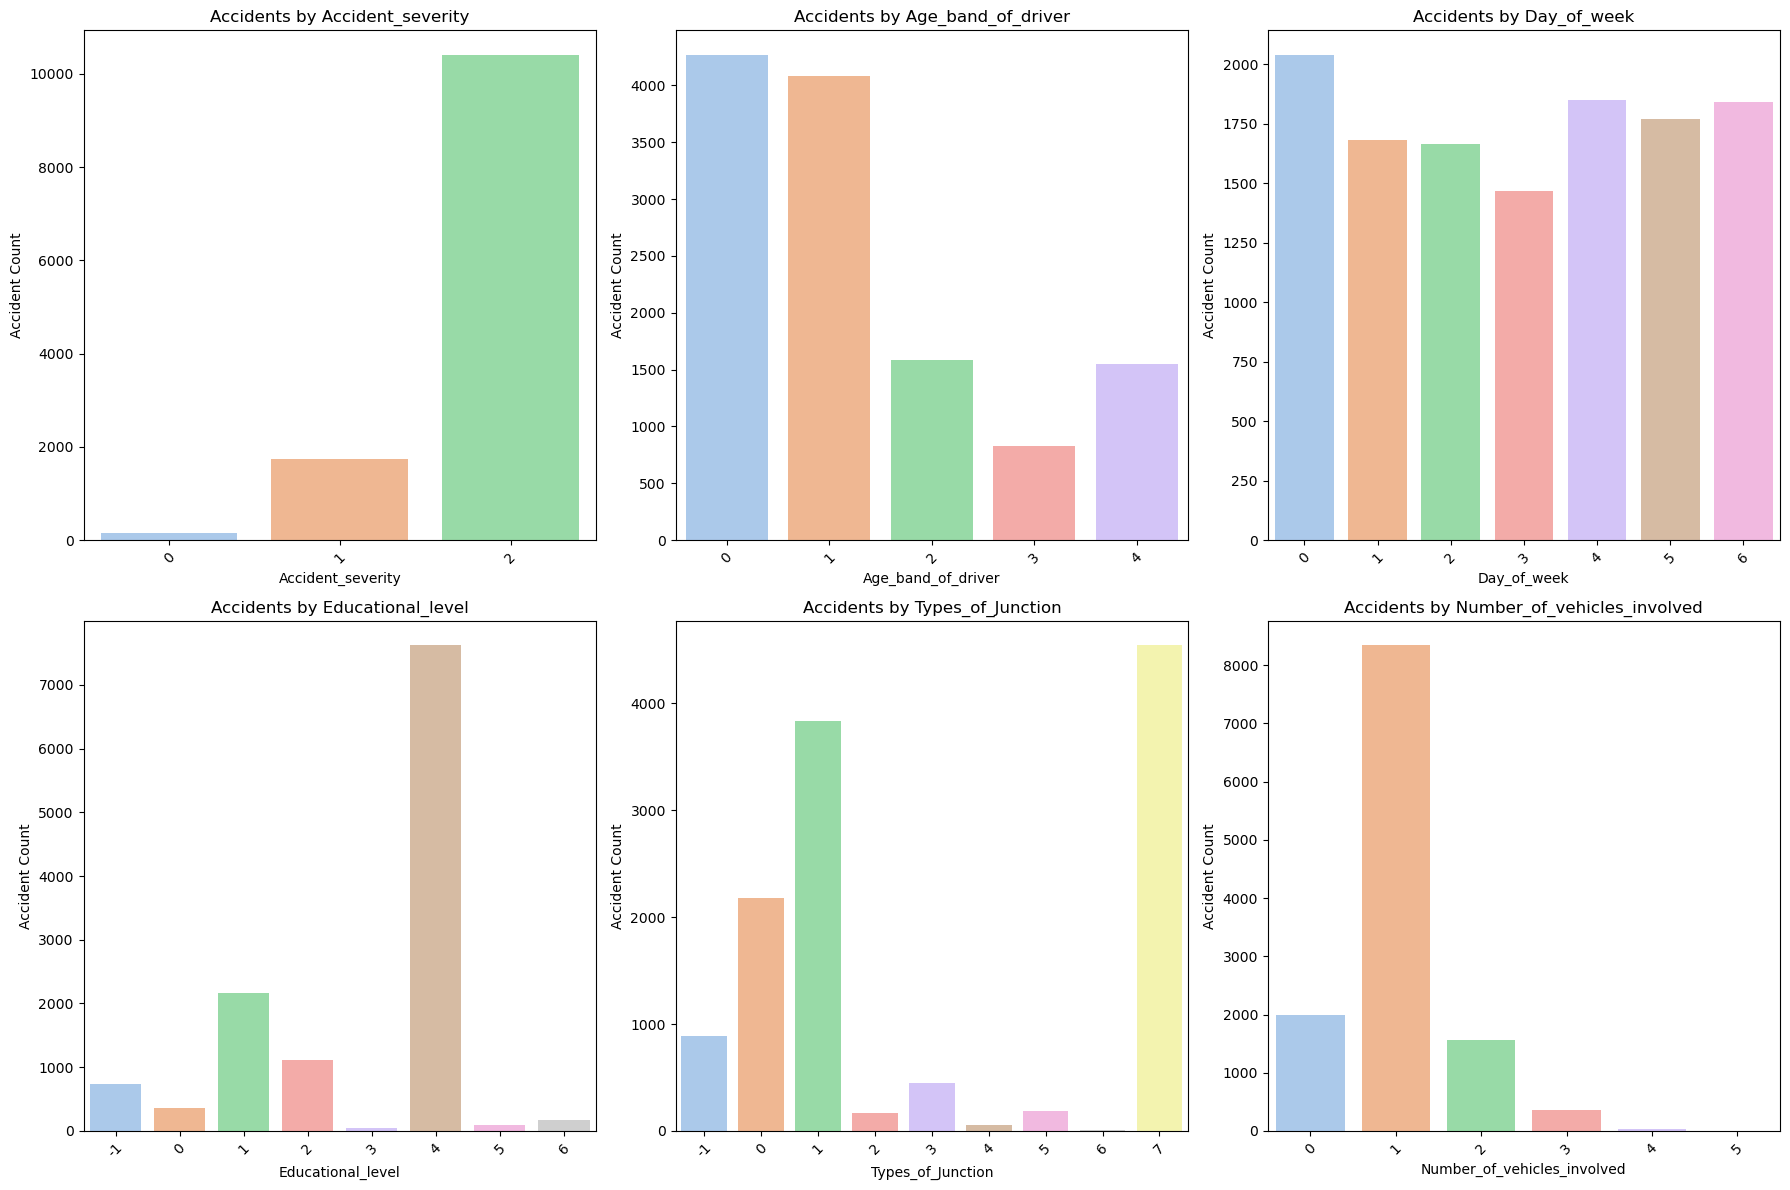

In [38]:
# Plot interactive subplots for categorical variables
category_cols = ['Accident_severity', 'Age_band_of_driver', 'Day_of_week', 'Educational_level', 'Types_of_Junction', 'Number_of_vehicles_involved']
interactive_subplots(Accidents, category_cols)


In [39]:
# Contributing Factors Analysis (Interactive Plot)
contributing_factors_counts = Accidents['Cause_of_accident'].value_counts()
fig = px.bar(x=contributing_factors_counts.index, y=contributing_factors_counts.values, labels={'x': 'Contributing Factors', 'y': 'Accident Count'},
             title='Contributing Factors to Accidents')
fig.update_layout(xaxis_tickangle=-45, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [40]:
# Defect in Vehicles (Interactive Plot)
defect_count = Accidents['Defect_of_vehicle'].value_counts()
fig = px.bar(x=defect_count.index, y=defect_count.values, labels={'x': 'Defect', 'y': 'Accident Count'},
             title='Defect in Vehicles')
fig.update_layout(xaxis_tickangle=-45, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [41]:
# Light Conditions (Interactive Plot)
light_count = Accidents['Light_conditions'].value_counts()
fig = px.bar(x=light_count.index, y=light_count.values, labels={'x': 'Light Conditions', 'y': 'Accident Count'},
             title='Light Conditions')
fig.update_layout(xaxis_tickangle=-45, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

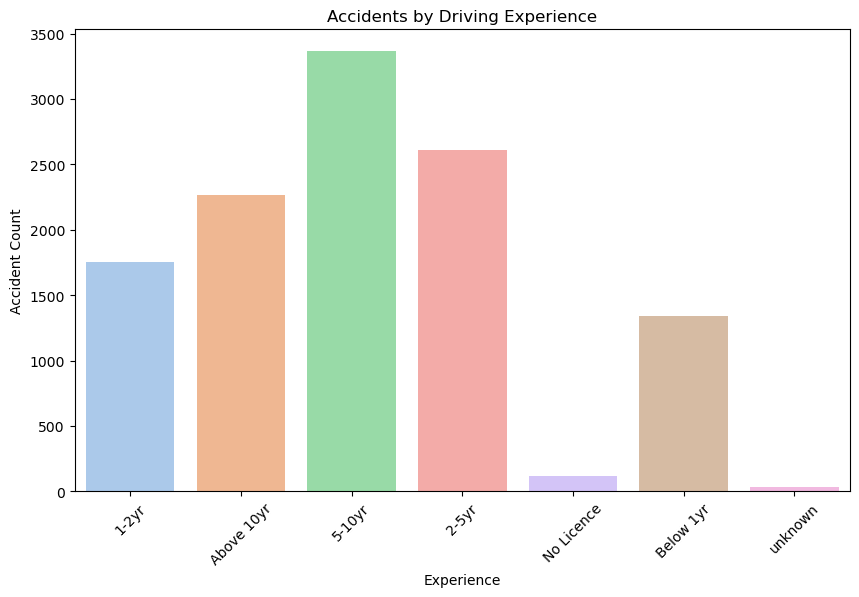

In [42]:
# Driving Experience Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_experience', data=Accidents, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Experience')
plt.ylabel('Accident Count')
plt.title('Accidents by Driving Experience')
plt.show()

In [43]:
# Age band of Casualty (Interactive Plot)
age_counts = Accidents['Age_band_of_casualty'].value_counts()
fig = px.bar(x=age_counts.index, y=age_counts.values, labels={'x': 'Casualty Age', 'y': 'Accident Count'},
             title='Casualty by Age Band')
fig.update_layout(xaxis_tickangle=-45, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()